How to predict customer churn?  

Below is the data for this time.

* mou_Mean Mean number of monthly minutes of use
* totmrc_Mean Mean total monthly recurring charge
* ovrrev_Mean Mean overage revenue
* change_mou Percentage change in monthly minutes of use vs previous three month average month average
* unan_vce_Mean Mean number of unanswered voice calls
* cc_mou_Mean Mean unrounded minutes of use of customer care (see CUSTCARE_MEAN) calls
* churn Instance of churn between 31–60 days after observation date
* months Total number of months in service
* crclscod Credit class code
* totcalls Total number of calls over the life of the customer
* totmou Total minutes of use over the life of the customer
totrev Total revenue
* adjrev Billing adjusted total revenue over the life of the customer
* adjqty Billing adjusted total number of calls over the life of the customer
* avgrev Average monthly revenue over the life of the customer
* avgmou Average monthly minutes of use over the life of the customer
* avgqty Average monthly number of calls over the life of the customer
* avg6rev Average monthly revenue over the previous six months
* area Geogrpahic area
* hnd_price Current handset price
* phones Number of handsets issued
* models Number of models issued
* eqpdays Number of days (age) of current equipment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [3]:
input_data_dir = ""
output_data_dir = ""

In [4]:
# type
my_dtype = {
    'Customer_ID':float,
    'rev_Mean':float,
    'mou_Mean':float,
    'totmrc_Mean':float,
    'da_Mean':float,
    'ovrmou_Mean':float,
    'vceovr_Mean':float,
    'datovr_Mean':float,
    'roam_Mean':float,
    'change_mou':float,
    'change_rev':float,
    'drop_vce_Mean':float,
    'drop_dat_Mean':float,
    'blck_vce_Mean':float,
    'blck_dat_Mean':float,
    'unan_vce_Mean':float,
    'unan_dat_Mean':float,
    'plcd_vce_Mean':float,
    'plcd_dat_Mean':float,
    'recv_vce_Mean':float,
    'recv_sms_Mean':float,
    'comp_vce_Mean':float,
    'comp_dat_Mean':float,
    'custcare_Mean':float,
    'ccrndmou_Mean':float,
    'cc_mou_Mean':float,
    'inonemin_Mean':float,
    'threeway_Mean':float,
    'mou_cvce_Mean':float,
    'mou_cdat_Mean':float,
    'mou_rvce_Mean':float,
    'owylis_vce_Mean':float,
    'mouowylisv_Mean':float,
    'iwylis_vce_Mean':float,
    'mouiwylisv_Mean':float,
    'peak_vce_Mean':float,
    'peak_dat_Mean':float,
    'mou_peav_Mean':float,
    'mou_pead_Mean':float,
    'opk_vce_Mean':float,
    'opk_dat_Mean':float,
    'mou_opkv_Mean':float,
    'mou_opkd_Mean':float,
    'drop_blk_Mean':float,
    'attempt_Mean':float,
    'complete_Mean':float,
    'callfwdv_Mean':float,
    'callwait_Mean':float,
    'churn':float,
    'months':float,
    'uniqsubs':float,
    'actvsubs':float,
    'new_cell':object,
    'crclscod':object,
    'asl_flag':object,
    'totcalls':float,
    'totmou':float,
    'totrev':float,
    'adjrev':float,
    'adjmou':float,
    'adjqty':float,
    'avgrev':float,
    'avgmou':float,
    'avgqty':float,
    'avg3mou':float,
    'avg3qty':float,
    'avg3rev':float,
    'avg6mou':float,
    'avg6qty':float,
    'avg6rev':float,
    'prizm_social_one':object,
    'area':object,
    'dualband':object,
    'refurb_new':object,
    'hnd_price':float,
    'phones':float,
    'models':float,
    'hnd_webcap':object,
    'truck':float,
    'rv':float,
    'ownrent':object,
    'lor':float,
    'dwlltype':object,
    'marital':object,
    'adults':float,
    'infobase':object,
    'income':float,
    'numbcars':float,
    'HHstatin':object,
    'dwllsize':object,
    'forgntvl':float,
    'ethnic':object,
    'kid0_2':object,
    'kid3_5':object,
    'kid6_10':object,
    'kid11_15':object,
    'kid16_17':object,
    'creditcd':object,
    'eqpdays':float,
}
numeric_feature = [
    'Customer_ID',
    'rev_Mean',
    'mou_Mean',
    'totmrc_Mean',
    'da_Mean',
    'ovrmou_Mean',
    'vceovr_Mean',
    'datovr_Mean',
    'roam_Mean',
    'change_mou',
    'change_rev',
    'drop_vce_Mean',
    'drop_dat_Mean',
    'blck_vce_Mean',
    'blck_dat_Mean',
    'unan_vce_Mean',
    'unan_dat_Mean',
    'plcd_vce_Mean',
    'plcd_dat_Mean',
    'recv_vce_Mean',
    'recv_sms_Mean',
    'comp_vce_Mean',
    'comp_dat_Mean',
    'custcare_Mean',
    'ccrndmou_Mean',
    'cc_mou_Mean',
    'inonemin_Mean',
    'threeway_Mean',
    'mou_cvce_Mean',
    'mou_cdat_Mean',
    'mou_rvce_Mean',
    'owylis_vce_Mean',
    'mouowylisv_Mean',
    'iwylis_vce_Mean',
    'mouiwylisv_Mean',
    'peak_vce_Mean',
    'peak_dat_Mean',
    'mou_peav_Mean',
    'mou_pead_Mean',
    'opk_vce_Mean',
    'opk_dat_Mean',
    'mou_opkv_Mean',
    'mou_opkd_Mean',
    'drop_blk_Mean',
    'attempt_Mean',
    'complete_Mean',
    'callfwdv_Mean',
    'callwait_Mean',
    'churn',
    'months',
    'uniqsubs',
    'actvsubs',
    'totcalls',
    'totmou',
    'totrev',
    'adjrev',
    'adjmou',
    'adjqty',
    'avgrev',
    'avgmou',
    'avgqty',
    'avg3mou',
    'avg3qty',
    'avg3rev',
    'avg6mou',
    'avg6qty',
    'avg6rev',
    'hnd_price',
    'phones',
    'models',
    'truck',
    'rv',
    'lor',
    'adults',
    'income',
    'numbcars',
    'forgntvl',
    'eqpdays',
]
categorical_features = [
   'new_cell',
   'crclscod',
   'asl_flag',
   'area',
   'dualband',
   'refurb_new',
   'hnd_webcap',
   'ownrent',
   'dwlltype',
   'marital',
   'infobase',
   'HHstatin',
   'dwllsize',
   'ethnic',
   'kid0_2',
   'kid3_5',
   'kid6_10',
   'kid11_15',
   'kid16_17',
   'creditcd',
   'prizm_social_one'
]
target_label = ['churn']
train_file_name = input_data_dir + 'Telecom_customer churn.csv'

In [5]:
import pandas as pd
def input_train_file(filename, my_dtype):

    df = pd.read_csv(train_file_name, header=0, dtype=my_dtype)
    for column in target_label:
        y = df[column]
    X = df.drop(target_label, axis=1)
    X = X.reset_index(drop=True)
    print('missing value all count:input_train_file', X.isnull().sum().sum())
    print('missing value count per column:input_train_file', X.isnull().sum())
    return df, X, y

In [6]:
df, X, y = input_train_file(train_file_name, my_dtype)

missing value all count:input_train_file 342969
missing value count per column:input_train_file rev_Mean        357
mou_Mean        357
totmrc_Mean     357
da_Mean         357
ovrmou_Mean     357
               ... 
kid11_15       1732
kid16_17       1732
creditcd       1732
eqpdays           1
Customer_ID       0
Length: 99, dtype: int64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

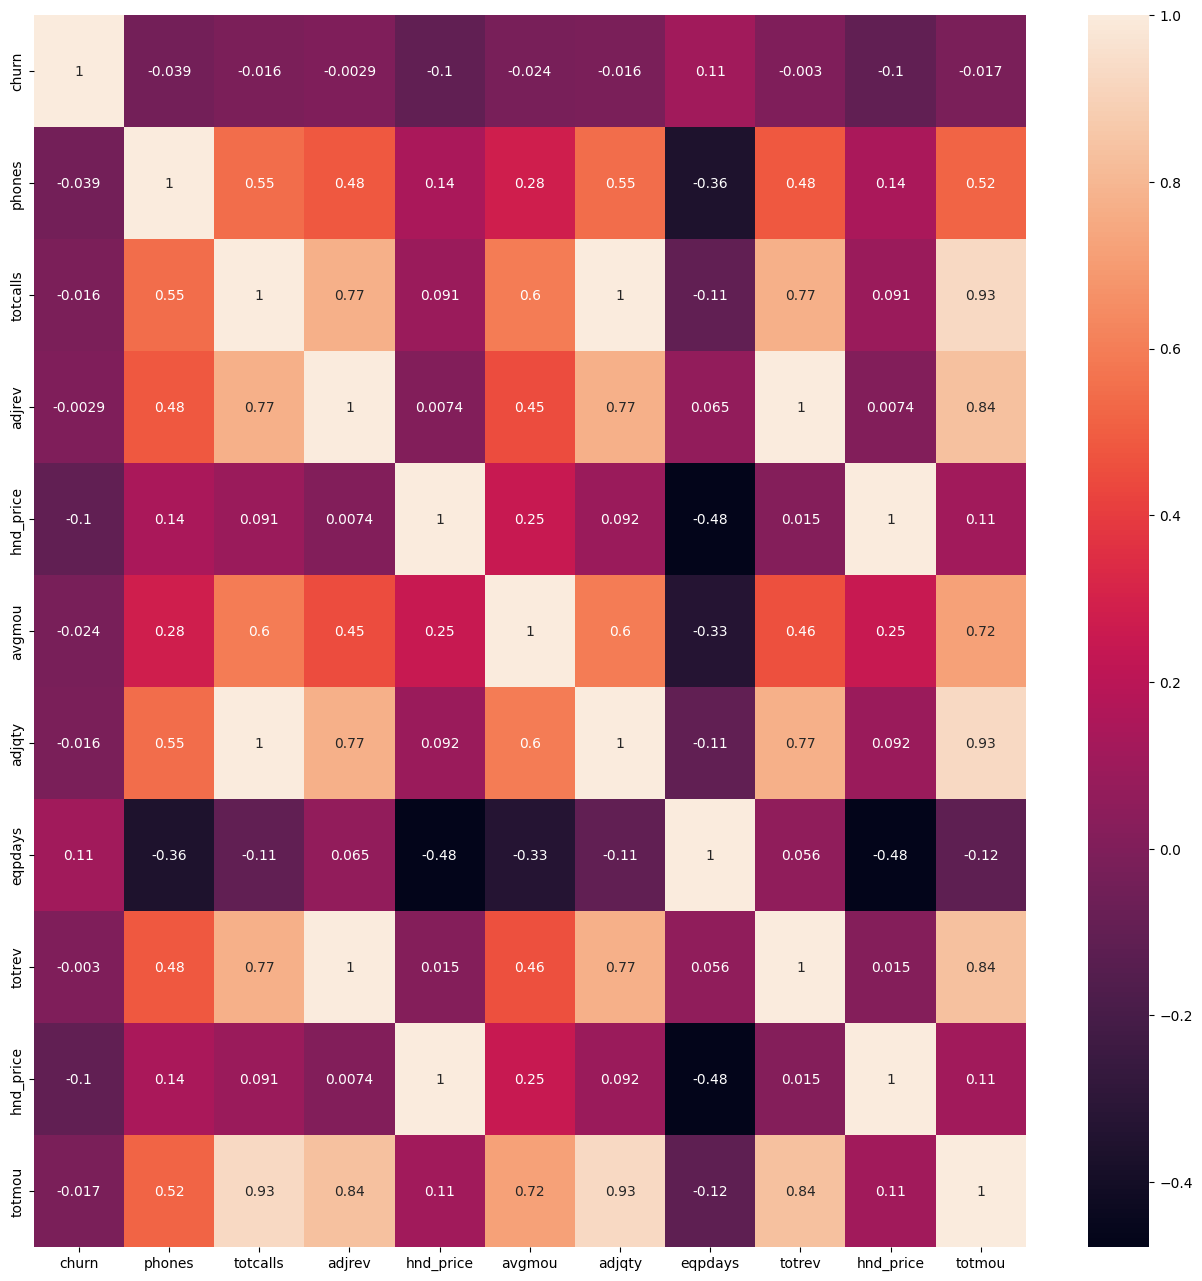

In [8]:
plt.figure(figsize=(16, 16))
sns.heatmap(df[['churn', 'phones', 'totcalls', 'adjrev', 'hnd_price', 'refurb_new', 'hnd_webcap', 'avgmou', 'adjqty', 'eqpdays', 'totrev', 'hnd_price', 'totmou']].corr(), annot=True)
plt.show()

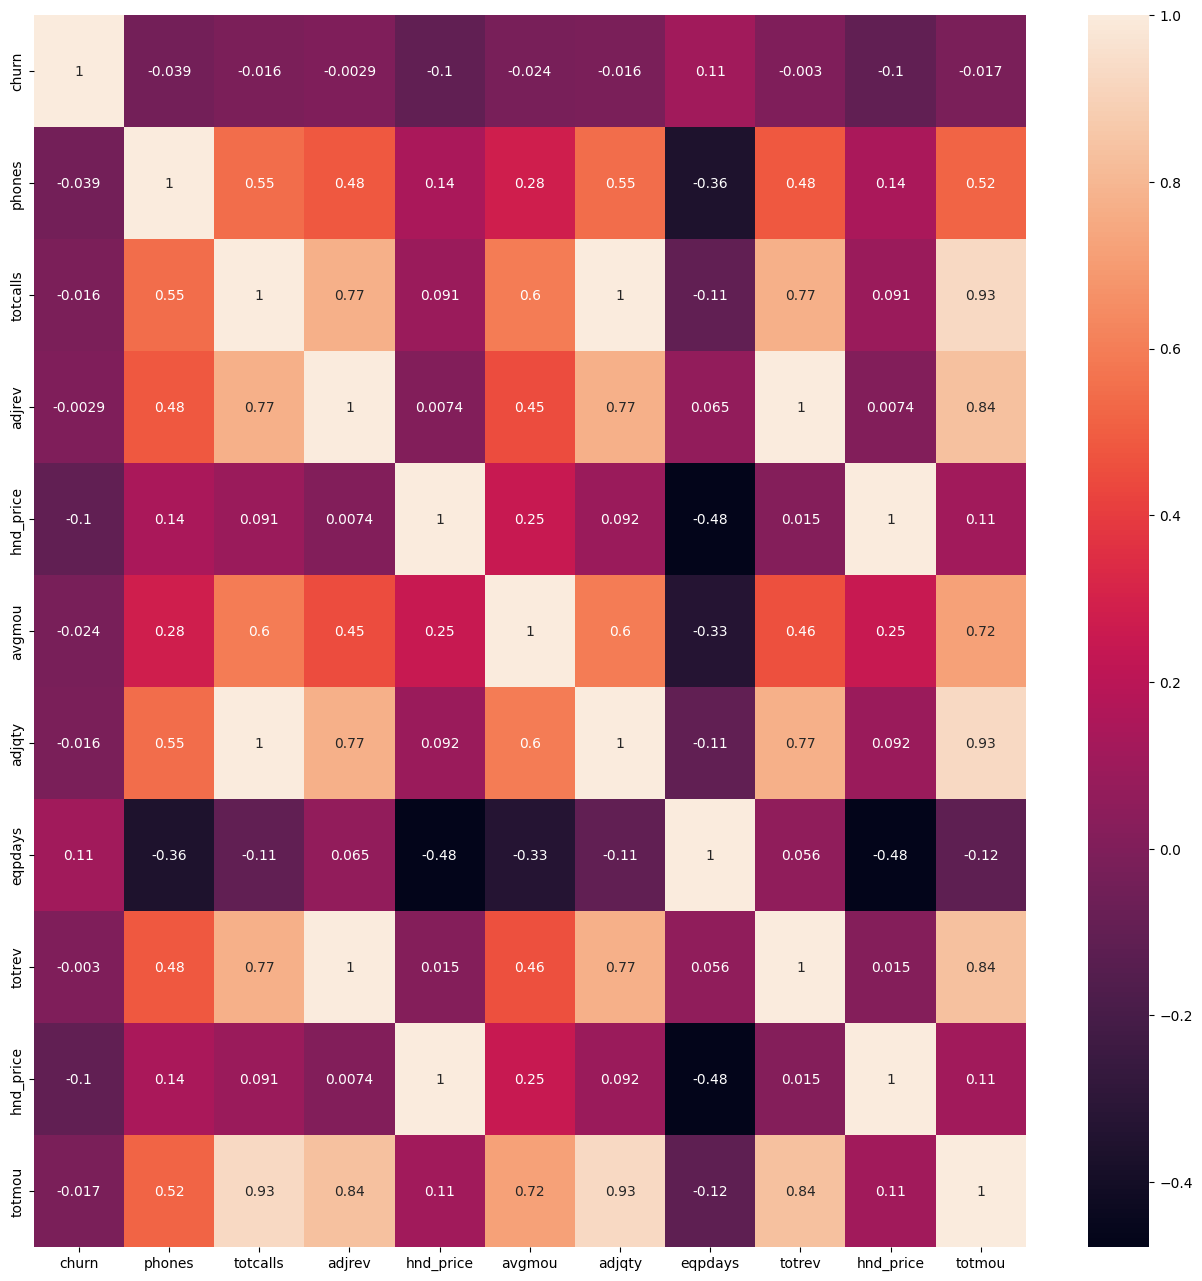

In [9]:
plt.figure(figsize=(16, 16))
sns.heatmap(df[['churn', 'phones', 'totcalls', 'adjrev', 'hnd_price', 'refurb_new', 'hnd_webcap', 'avgmou', 'adjqty', 'eqpdays', 'totrev', 'hnd_price', 'totmou']].corr(), annot=True)
plt.show()

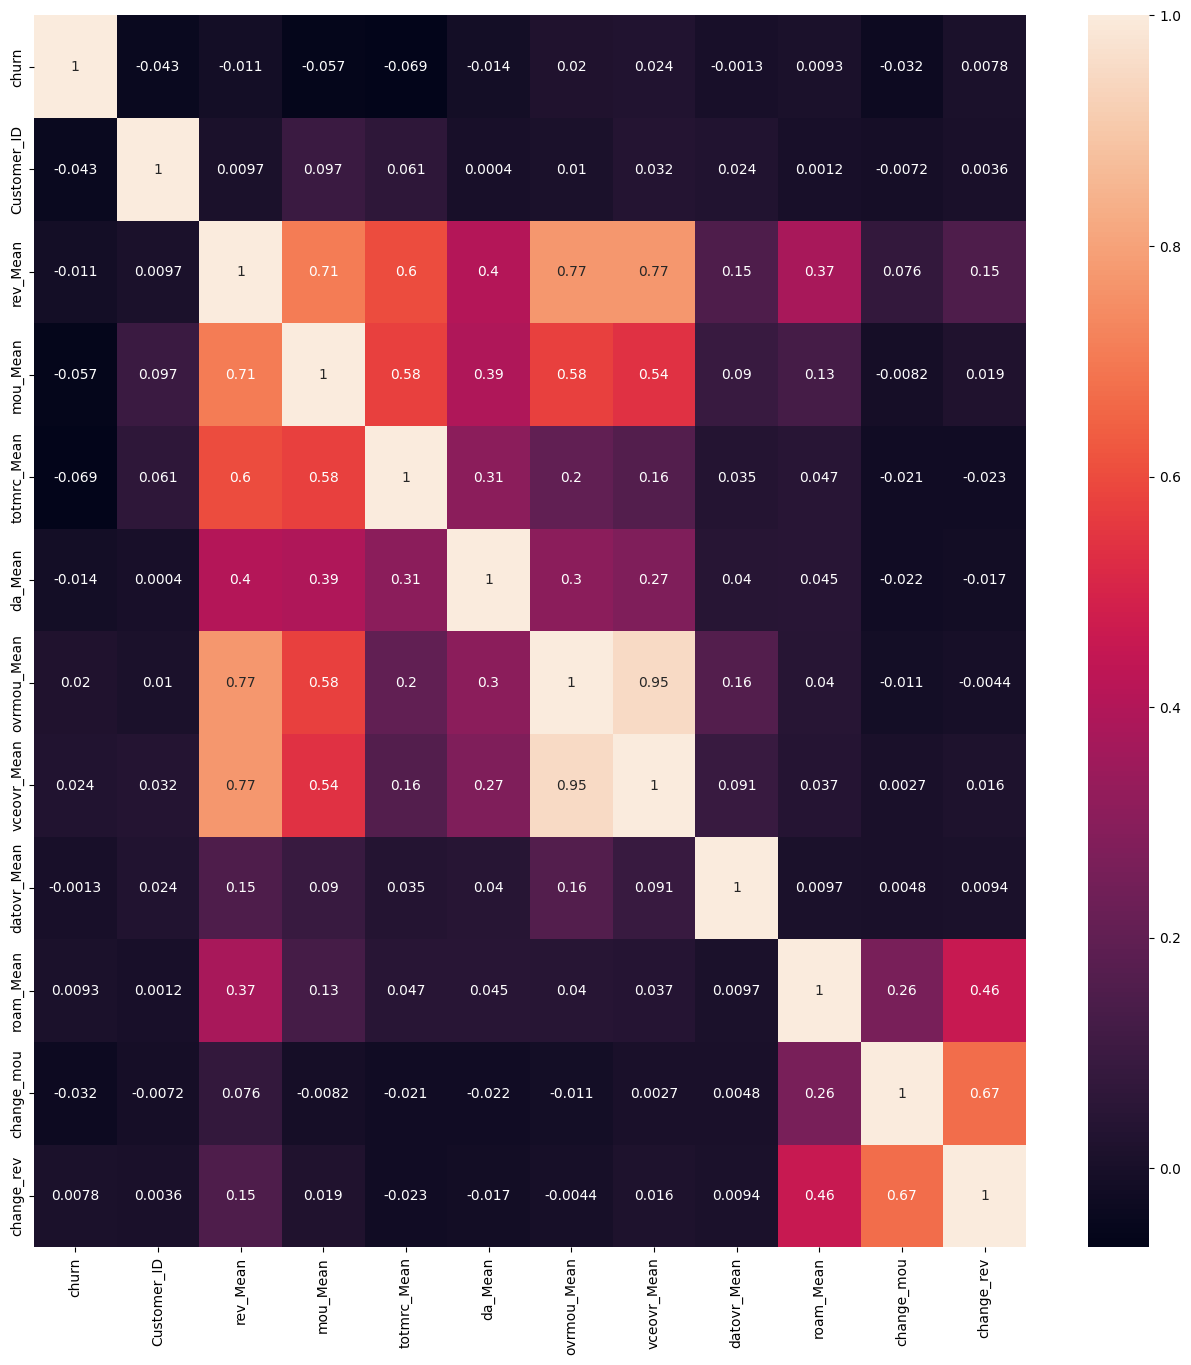

In [10]:
plt.figure(figsize=(16, 16))
sns.heatmap(df[[
    'churn',
    'Customer_ID',
    'rev_Mean',
    'mou_Mean',
    'totmrc_Mean',
    'da_Mean',
    'ovrmou_Mean',
    'vceovr_Mean',
    'datovr_Mean',
    'roam_Mean',
    'change_mou',
    'change_rev']].corr(), annot=True)
plt.show()

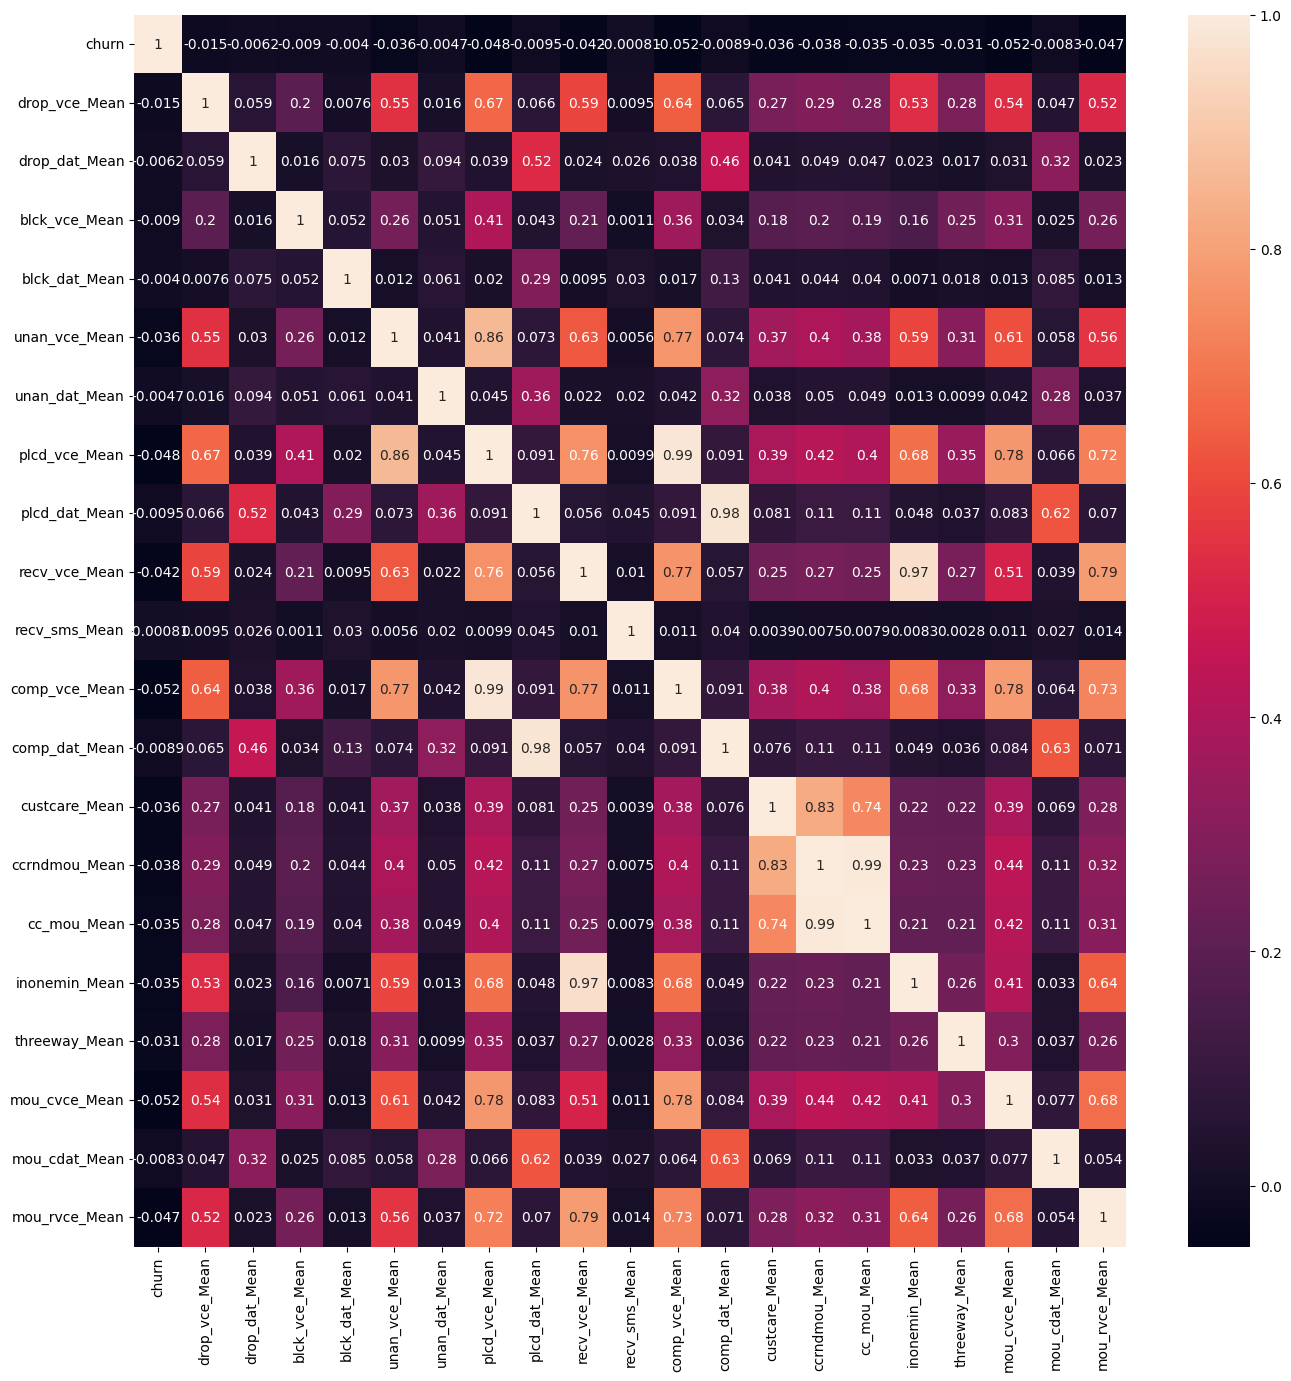

In [11]:
plt.figure(figsize=(16, 16))
sns.heatmap(df[[
        'churn',
    'drop_vce_Mean',
    'drop_dat_Mean',
    'blck_vce_Mean',
    'blck_dat_Mean',
    'unan_vce_Mean',
    'unan_dat_Mean',
    'plcd_vce_Mean',
    'plcd_dat_Mean',
    'recv_vce_Mean',
    'recv_sms_Mean',
    'comp_vce_Mean',
    'comp_dat_Mean',
    'custcare_Mean',
    'ccrndmou_Mean',
    'cc_mou_Mean',
    'inonemin_Mean',
    'threeway_Mean',
    'mou_cvce_Mean',
    'mou_cdat_Mean',
    'mou_rvce_Mean']].corr(), annot=True)
plt.show()

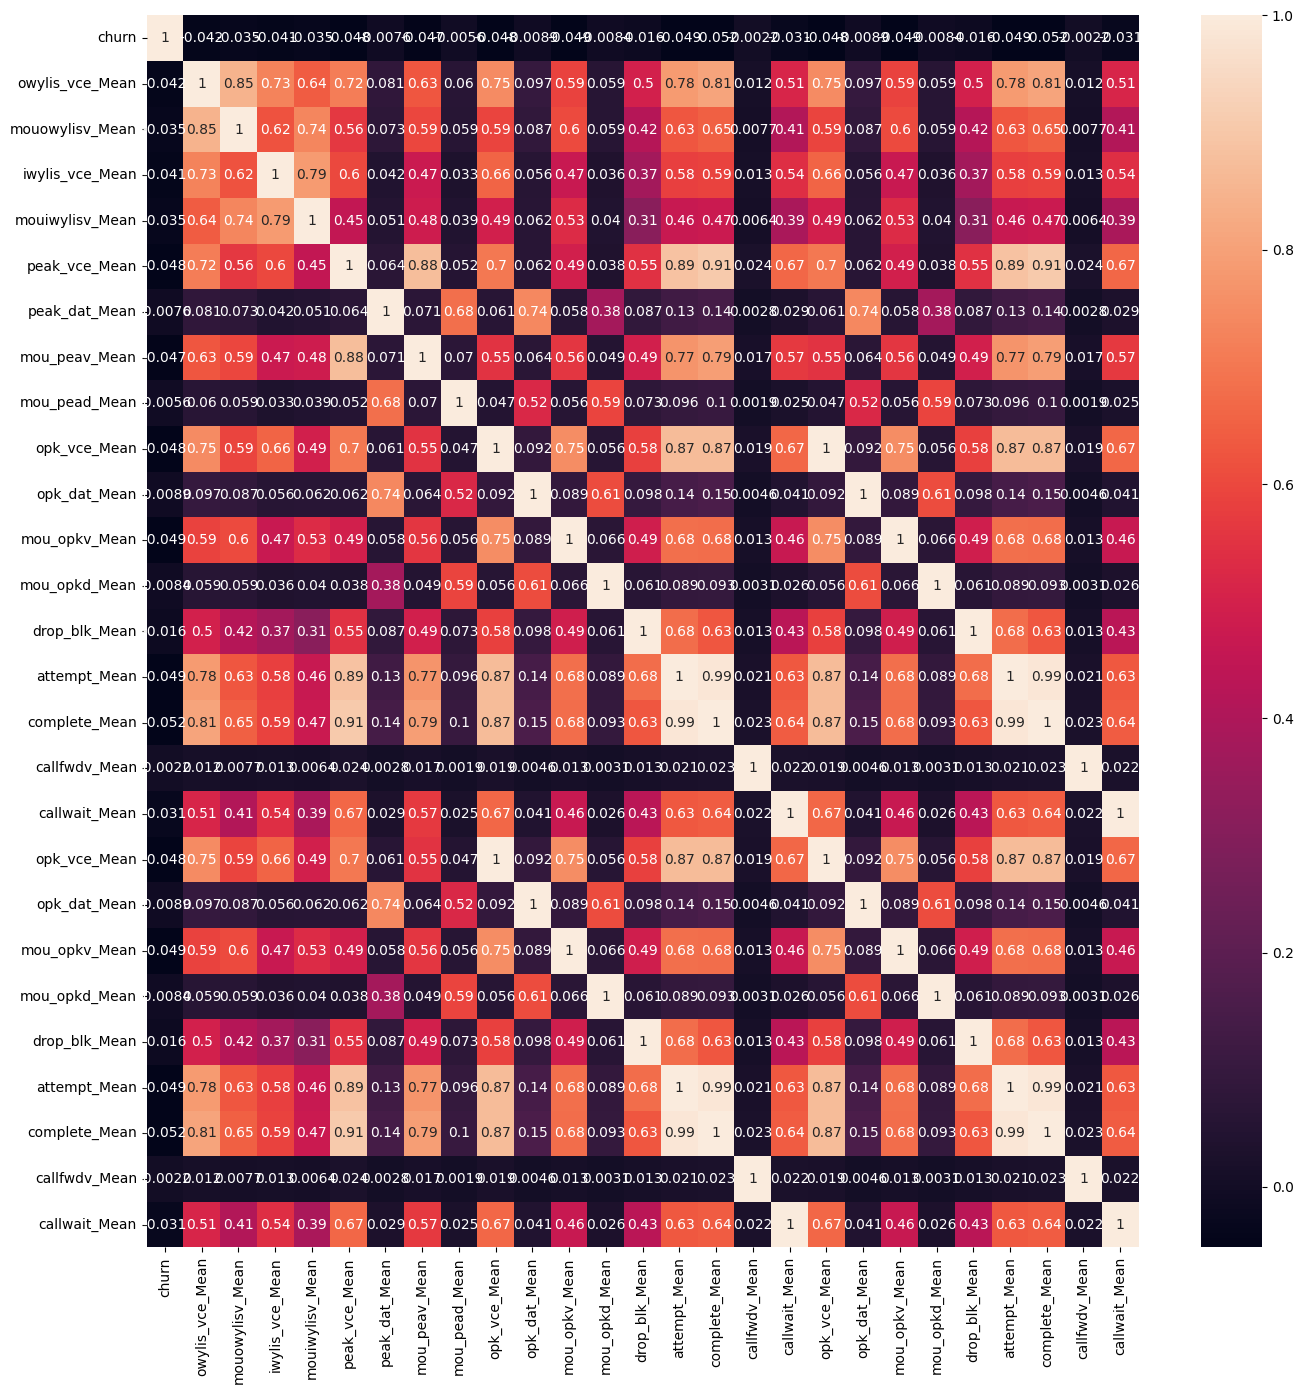

In [12]:
plt.figure(figsize=(16, 16))
sns.heatmap(df[[
    'churn',
    'owylis_vce_Mean',
    'mouowylisv_Mean',
    'iwylis_vce_Mean',
    'mouiwylisv_Mean',
    'peak_vce_Mean',
    'peak_dat_Mean',
    'mou_peav_Mean',
    'mou_pead_Mean',
    'opk_vce_Mean',
    'opk_dat_Mean',
    'mou_opkv_Mean',
    'mou_opkd_Mean',
    'drop_blk_Mean',
    'attempt_Mean',
    'complete_Mean',
    'callfwdv_Mean',
    'callwait_Mean',
    'opk_vce_Mean',
    'opk_dat_Mean',
    'mou_opkv_Mean',
    'mou_opkd_Mean',
    'drop_blk_Mean',
    'attempt_Mean',
    'complete_Mean',
    'callfwdv_Mean',
    'callwait_Mean']].corr(), annot=True)
plt.show()

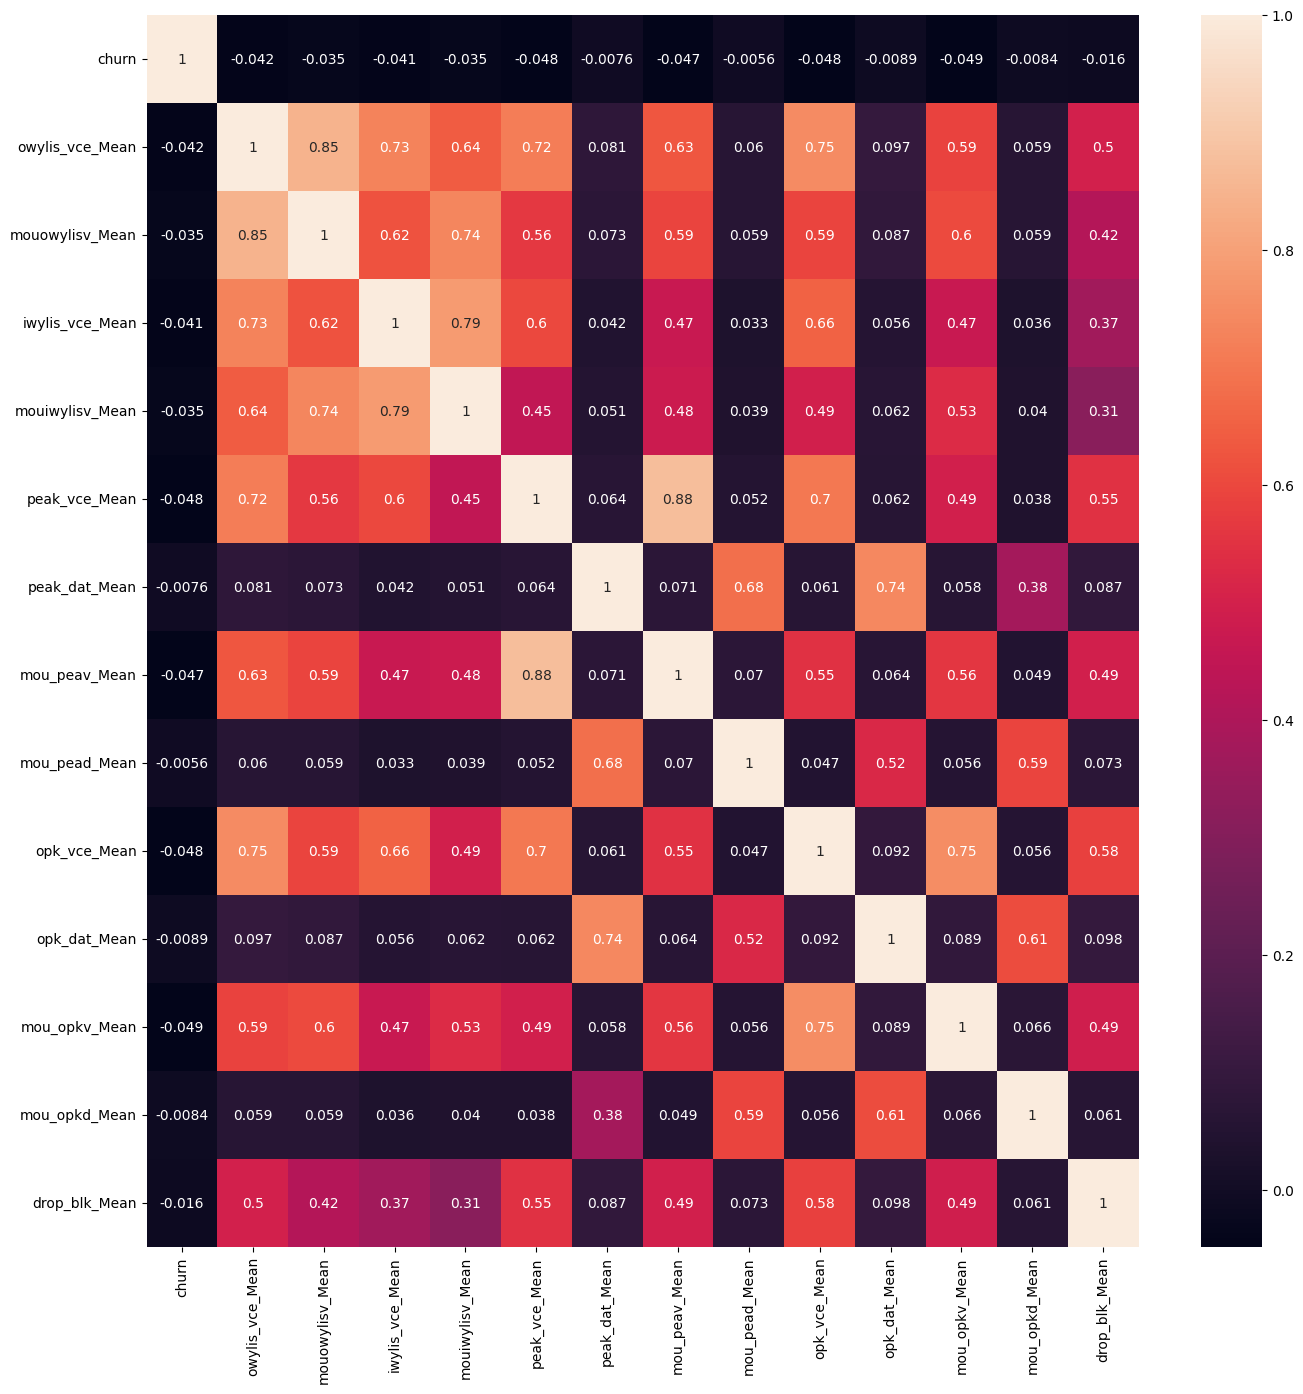

In [13]:
plt.figure(figsize=(16, 16))
sns.heatmap(df[[
    'churn',
    'owylis_vce_Mean',
    'mouowylisv_Mean',
    'iwylis_vce_Mean',
    'mouiwylisv_Mean',
    'peak_vce_Mean',
    'peak_dat_Mean',
    'mou_peav_Mean',
    'mou_pead_Mean',
    'opk_vce_Mean',
    'opk_dat_Mean',
    'mou_opkv_Mean',
    'mou_opkd_Mean',
    'drop_blk_Mean',]].corr(), annot=True)
plt.show()

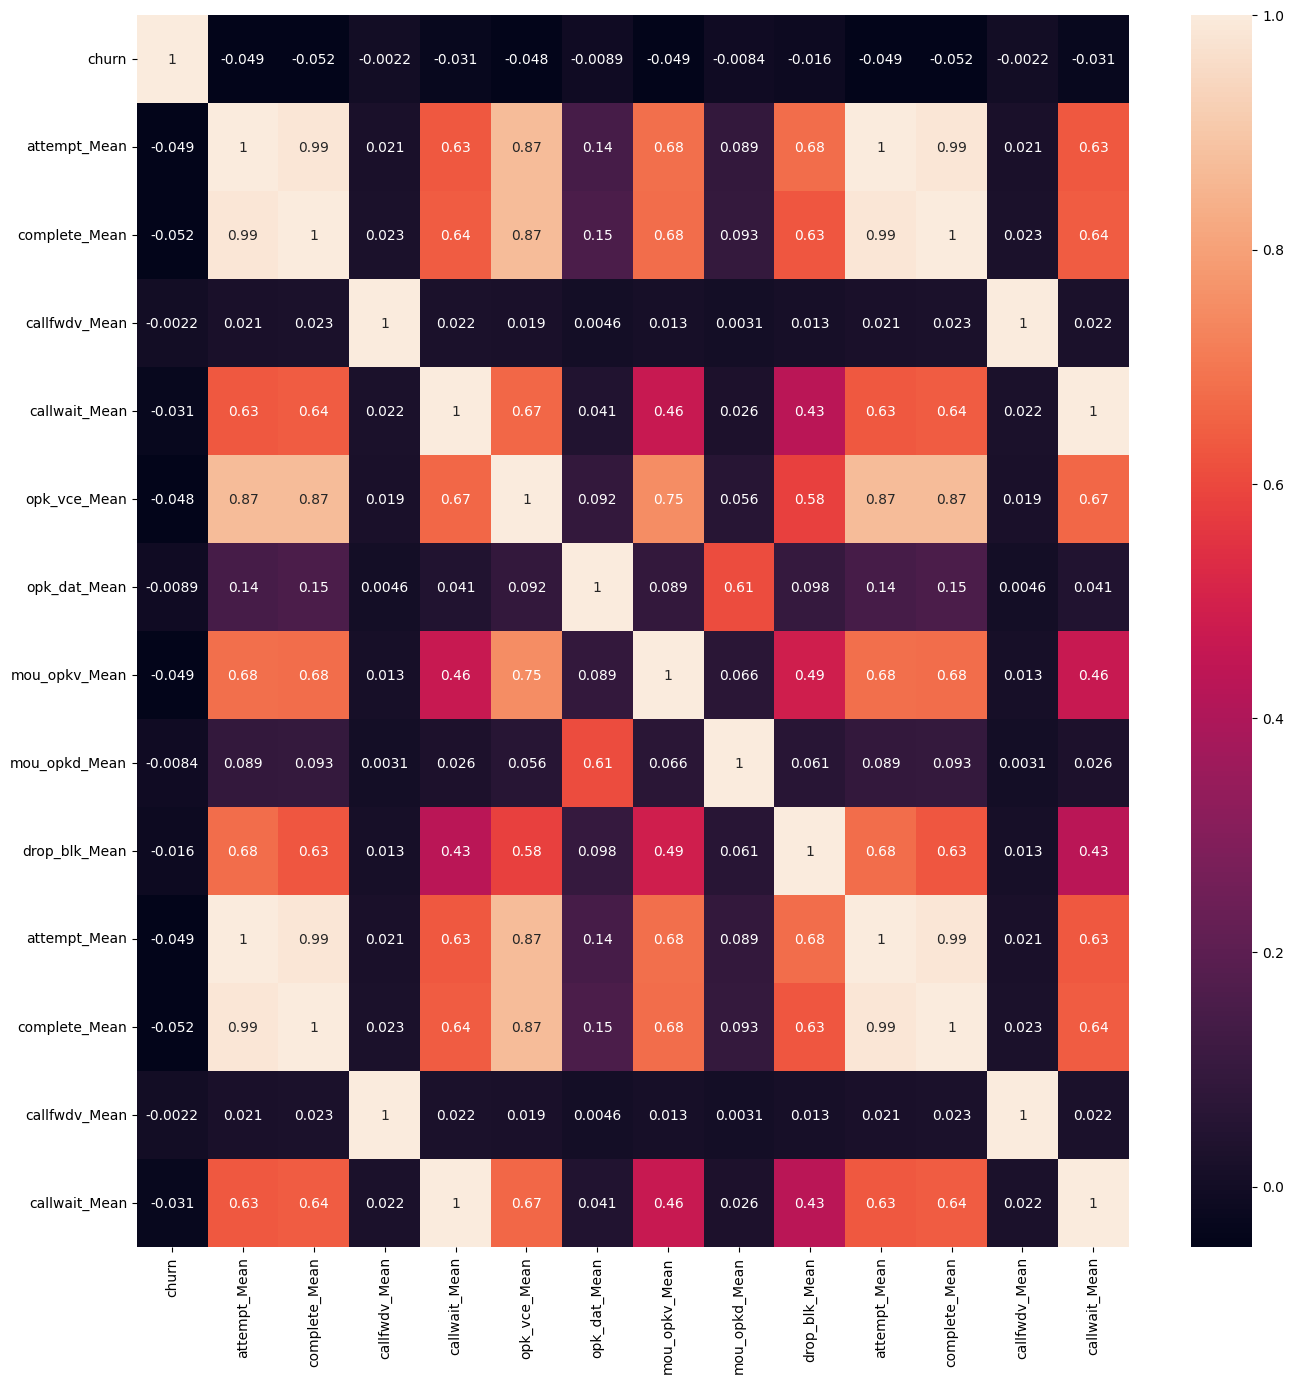

In [14]:
plt.figure(figsize=(16, 16))
sns.heatmap(df[[
        'churn',
    'attempt_Mean',
    'complete_Mean',
    'callfwdv_Mean',
    'callwait_Mean',
    'opk_vce_Mean',
    'opk_dat_Mean',
    'mou_opkv_Mean',
    'mou_opkd_Mean',
    'drop_blk_Mean',
    'attempt_Mean',
    'complete_Mean',
    'callfwdv_Mean',
    'callwait_Mean']].corr(), annot=True)
plt.show()

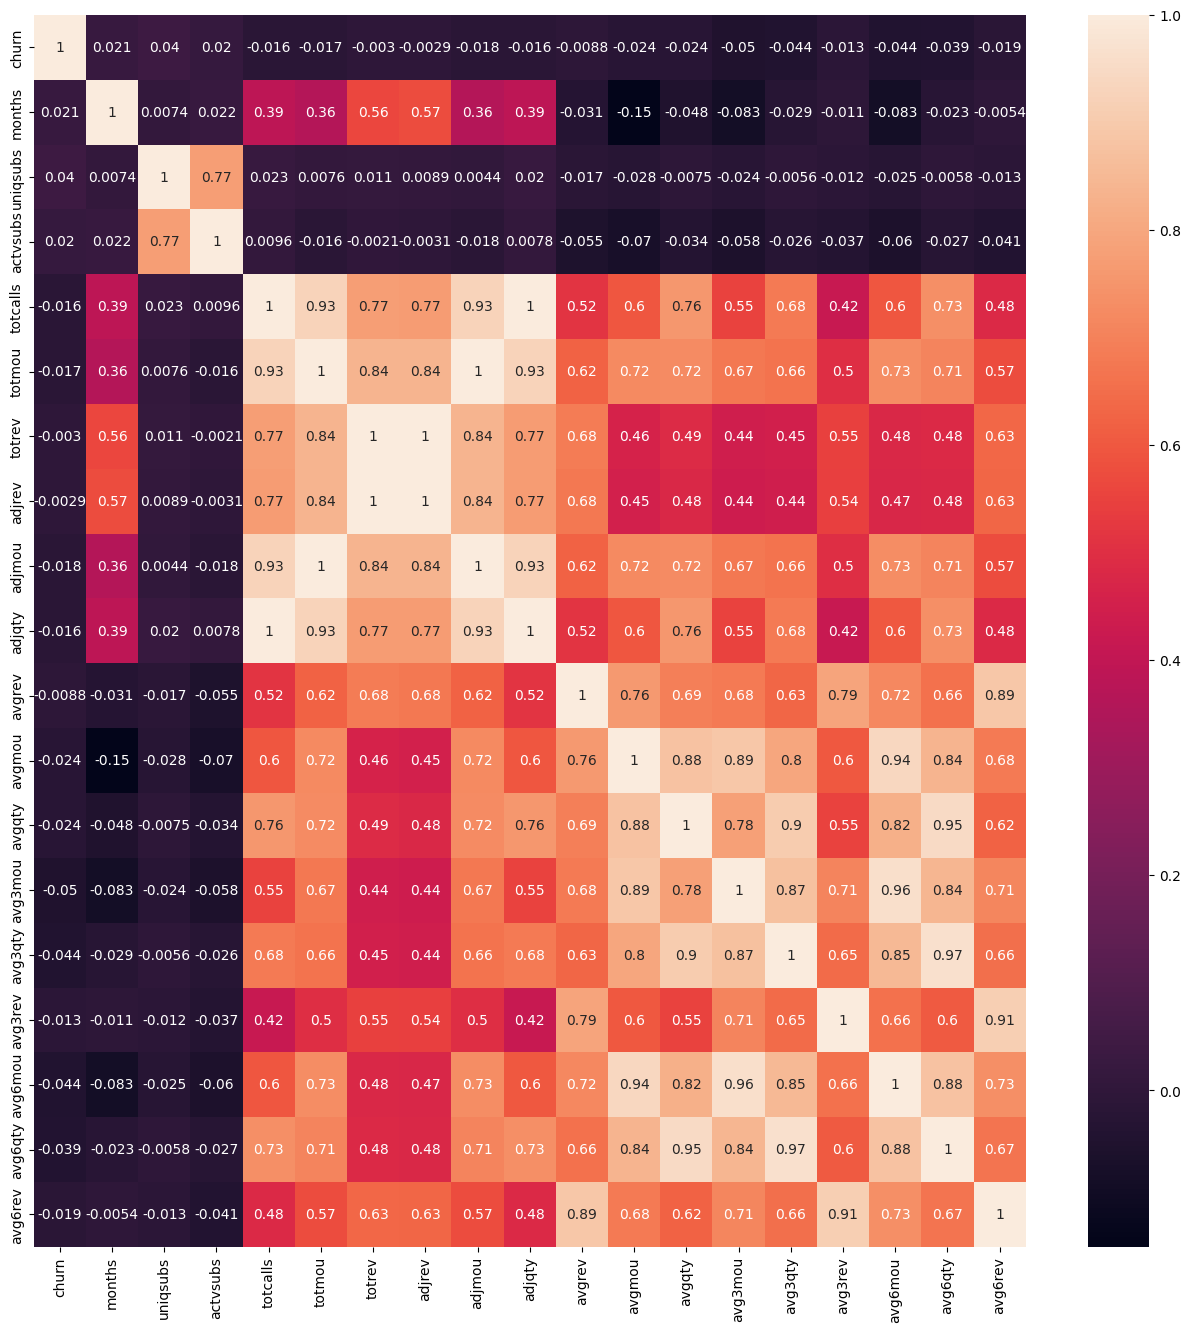

In [15]:
plt.figure(figsize=(16, 16))
sns.heatmap(df[[
    'churn',
    'months',
    'uniqsubs',
    'actvsubs',
    'totcalls',
    'totmou',
    'totrev',
    'adjrev',
    'adjmou',
    'adjqty',
    'avgrev',
    'avgmou',
    'avgqty',
    'avg3mou',
    'avg3qty',
    'avg3rev',
    'avg6mou',
    'avg6qty',
    'avg6rev']].corr(), annot=True)
plt.show()

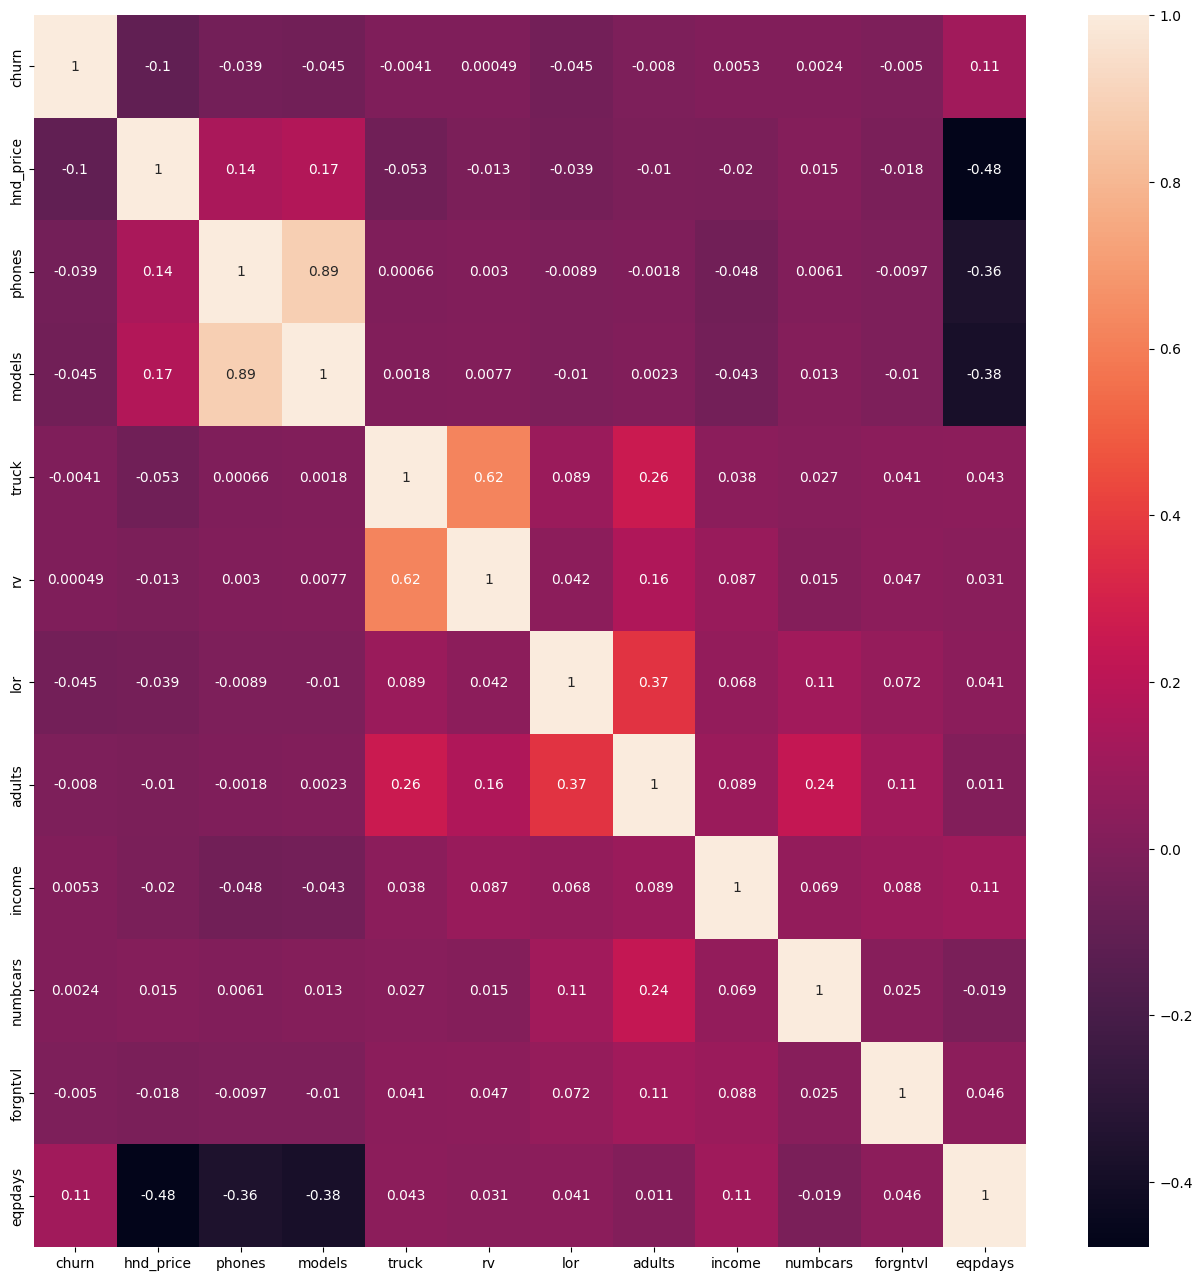

In [16]:
plt.figure(figsize=(16, 16))
sns.heatmap(df[[
    'churn',
    'hnd_price',
    'phones',
    'models',
    'truck',
    'rv',
    'lor',
    'adults',
    'income',
    'numbcars',
    'forgntvl',
    'eqpdays']].corr(), annot=True)
plt.show()

The figure above shows the correlation of the data, churn has no correlation

In [17]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [18]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe

    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector

    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the churn column
    3. Create y as the churn column
    4. Drop the churn, Respondent, and the Expected churn columns
    5. For each numeric variable, fill the column with the mean value.
    6. Create dummy columns for all the categorical variables, drop the original columns
    '''
    # Drop rows with missing churn values
    df = df.dropna(subset=['churn'], axis=0)
    y = df['churn']
    #Drop respondent and expected churn columns
    df = df.drop(['churn'], axis=1)

    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)

    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

    X = df
    return X, y

In [19]:
X, y = clean_data(df)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
X_test.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,kid0_2_Y,kid3_5_Y,kid6_10_Y,kid11_15_Y,kid16_17_Y,creditcd_Y
65968,31.0400,95.50,29.99,0.0000,0.00,0.0000,0.000,0.0000,1.0500,-7.50,...,0,0,0,0,0,0,0,0,0,1
56470,47.8750,583.75,46.28,0.4950,4.25,1.6375,0.175,1.4625,0.0000,1.25,...,0,0,0,0,0,0,0,0,0,1
74162,29.9900,71.50,39.99,0.0000,0.00,0.0000,0.000,0.0000,0.0000,44.50,...,1,0,0,0,0,0,0,0,0,1
34873,34.2350,166.50,29.99,0.7425,5.00,2.2500,2.250,0.0000,1.2525,-37.50,...,0,0,0,0,0,0,0,0,0,1
49967,116.6075,666.75,41.29,3.2175,199.00,79.6000,79.600,0.0000,0.0000,-666.75,...,1,0,0,0,0,0,0,0,0,1


In [22]:
model = lgb.LGBMClassifier(random_state=123).fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 34731, number of negative: 35269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15114
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 194
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496157 -> initscore=-0.015372
[LightGBM] [Info] Start training from score -0.015372


In [23]:
y_test_preds = model.predict(X_test) #We can then use our fitted model to predict the churn for each
                                        #indvidual in our test set, and see how well these predictions
                                        #match the truth.

In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_preds)

array([[9358, 5811],
       [5209, 9622]], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_preds)

0.6326666666666667

In [26]:
from sklearn.metrics import precision_score
precision_score(y_test, y_test_preds)

0.623469189399339

In [27]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_preds)

0.6358710018503833

In [28]:
!pip install shap

In [29]:
import shap

In [30]:
df_X = pd.DataFrame(X, columns=X.columns)
explainer = shap.Explainer(model.predict, X)

In [31]:
shap_values = explainer(df_X)

Permutation explainer: 100001it [2:11:56, 12.61it/s]                             


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


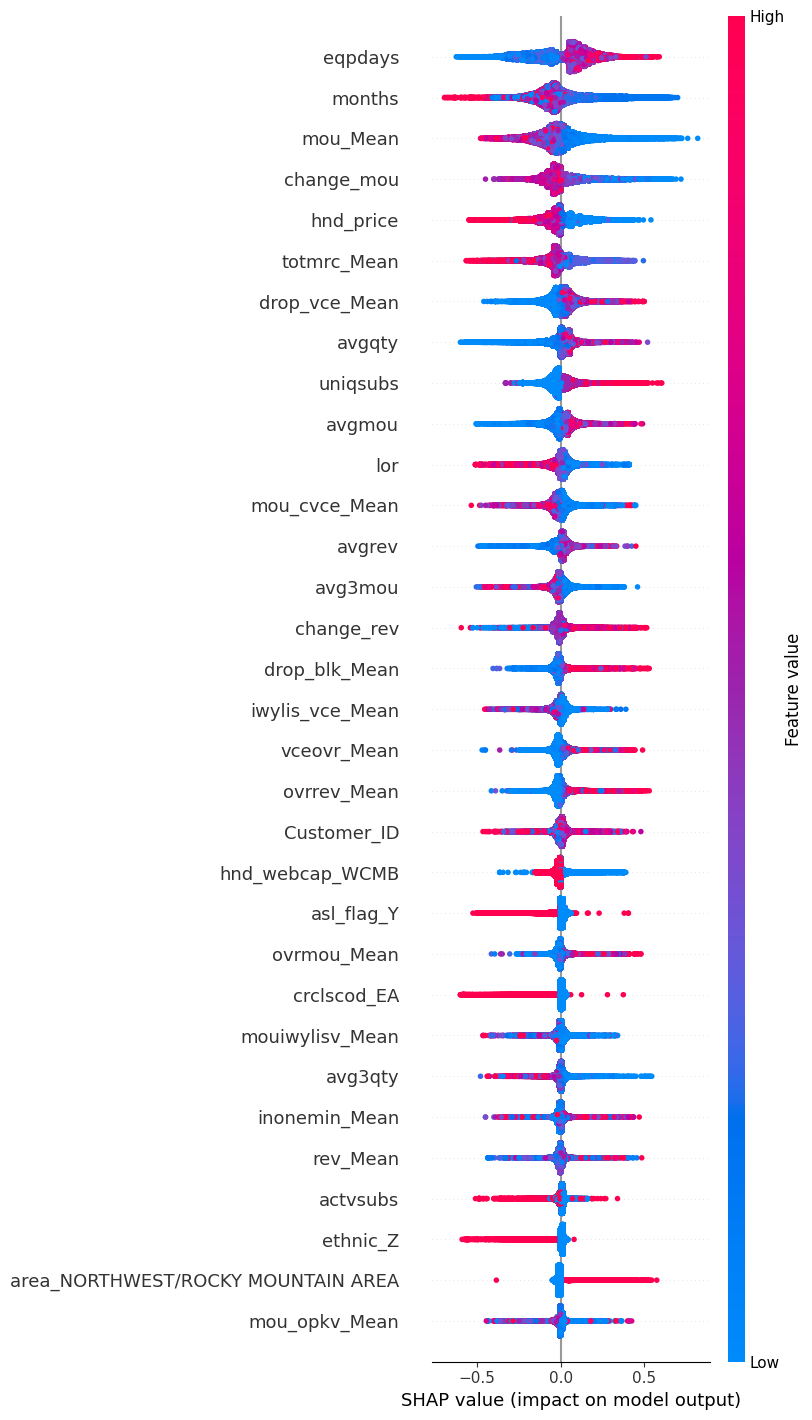

In [32]:
shap.summary_plot(
    shap_values = shap_values,
    features = X,
    max_display=32
)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


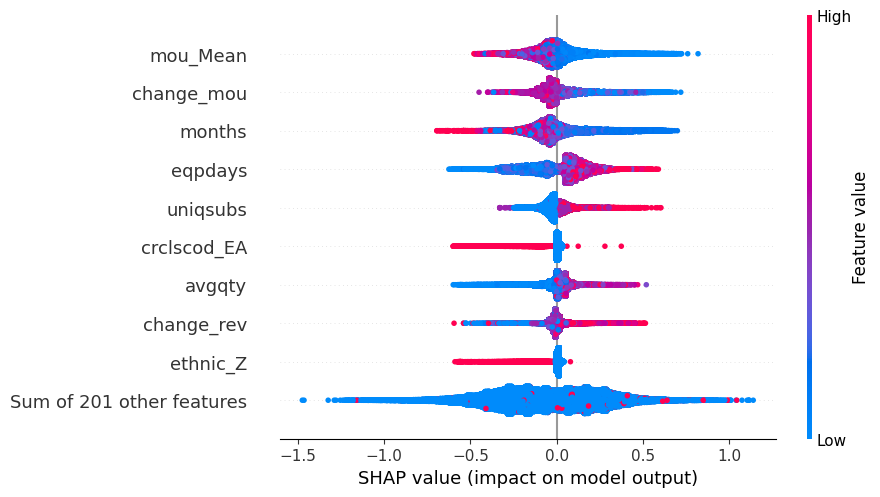

In [33]:
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0))

Clearly analyze the above results by omitting data that has no impact on the results.

In [34]:
drop_features = [
    'churn',
    'Customer_ID',
    'rev_Mean',
    'totmrc_Mean',
    'da_Mean',
    'ovrmou_Mean',
    'vceovr_Mean',
    'roam_Mean',
    'change_rev',
    'drop_dat_Mean',
    'blck_dat_Mean',
    'unan_dat_Mean',
    'plcd_vce_Mean',
    'plcd_dat_Mean',
    'recv_vce_Mean',
    'recv_sms_Mean',
    'comp_vce_Mean',
    'comp_dat_Mean',
    'custcare_Mean',
    'ccrndmou_Mean',
    'cc_mou_Mean',
    'inonemin_Mean',
    'threeway_Mean',
    'mou_cdat_Mean',
    'owylis_vce_Mean',
    'mouowylisv_Mean',
    'mouiwylisv_Mean',
    'peak_vce_Mean',
    'peak_dat_Mean',
    'mou_pead_Mean',
    'opk_vce_Mean',
    'opk_dat_Mean',
    'mou_opkv_Mean',
    'mou_opkd_Mean',
    'drop_blk_Mean',
    'attempt_Mean',
    'complete_Mean',
    'callfwdv_Mean',
    'callwait_Mean',
    'actvsubs',
    'new_cell',
    'asl_flag',
    'totmou',
    'adjrev',
    'adjmou',
    'adjqty',
    'avgqty',
    'avg3qty',
    'avg3rev',
    'avg6mou',
    'avg6qty',
    'avg6rev',
    'area',
    'dualband',
    'refurb_new',
    'hnd_price',
    'models',
    'hnd_webcap',
    'truck',
    'rv',
    'ownrent',
    'adults',
    'infobase',
    'income',
    'numbcars',
    'dwllsize',
    'forgntvl',
    'kid0_2',
    'kid3_5',
    'kid6_10',
    'kid11_15',
    'kid16_17',
    'creditcd'
]

In [35]:
df, X, y = input_train_file(train_file_name, my_dtype)

missing value all count:input_train_file 342969
missing value count per column:input_train_file rev_Mean        357
mou_Mean        357
totmrc_Mean     357
da_Mean         357
ovrmou_Mean     357
               ... 
kid11_15       1732
kid16_17       1732
creditcd       1732
eqpdays           1
Customer_ID       0
Length: 99, dtype: int64


In [36]:
def tract_data(df):
    '''
    INPUT
    df - pandas dataframe

    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector

    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns
    5. For each numeric variable, fill the column with the mean value.
    6. Create dummy columns for all the categorical variables, drop the original columns
    '''
    # Drop rows with missing churn values
    df = df.dropna(subset=['churn'], axis=0)
    y = df['churn']

    #Drop respondent and expected salary columns
    df = df.drop(drop_features, axis=1)

    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)

    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

    X = df
    return X, y

In [37]:
X, y = tract_data(df)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [39]:
model = lgb.LGBMClassifier(random_state=123).fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 34698, number of negative: 35302
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4577
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 88
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495686 -> initscore=-0.017258
[LightGBM] [Info] Start training from score -0.017258


In [40]:
y_test_preds = model.predict(X_test) #We can then use our fitted model to predict the salary for each
                                        #indvidual in our test set, and see how well these predictions
                                        #match the truth.

In [41]:
import numpy as np
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_preds)

array([[9419, 5717],
       [5467, 9397]], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_preds)

0.6272

In [43]:
from sklearn.metrics import precision_score
precision_score(y_test, y_test_preds)

0.6217414317850999

In [44]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_preds)

0.6269264127026486

In [45]:
importance = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance'])
importance = importance.sort_values('importance', ascending=False)
display(importance)

,importance
change_mou,254
mou_Mean,240
eqpdays,207
months,203
avgmou,160
...,...
crclscod_EF,0
crclscod_U1,0
crclscod_EC,0
crclscod_A3,0


In [46]:
import shap

In [47]:
df_X = pd.DataFrame(X, columns=X.columns)
explainer = shap.Explainer(model.predict, X)

In [48]:
shap_values = explainer(df_X)

Permutation explainer: 100001it [1:21:10, 20.49it/s]                            


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


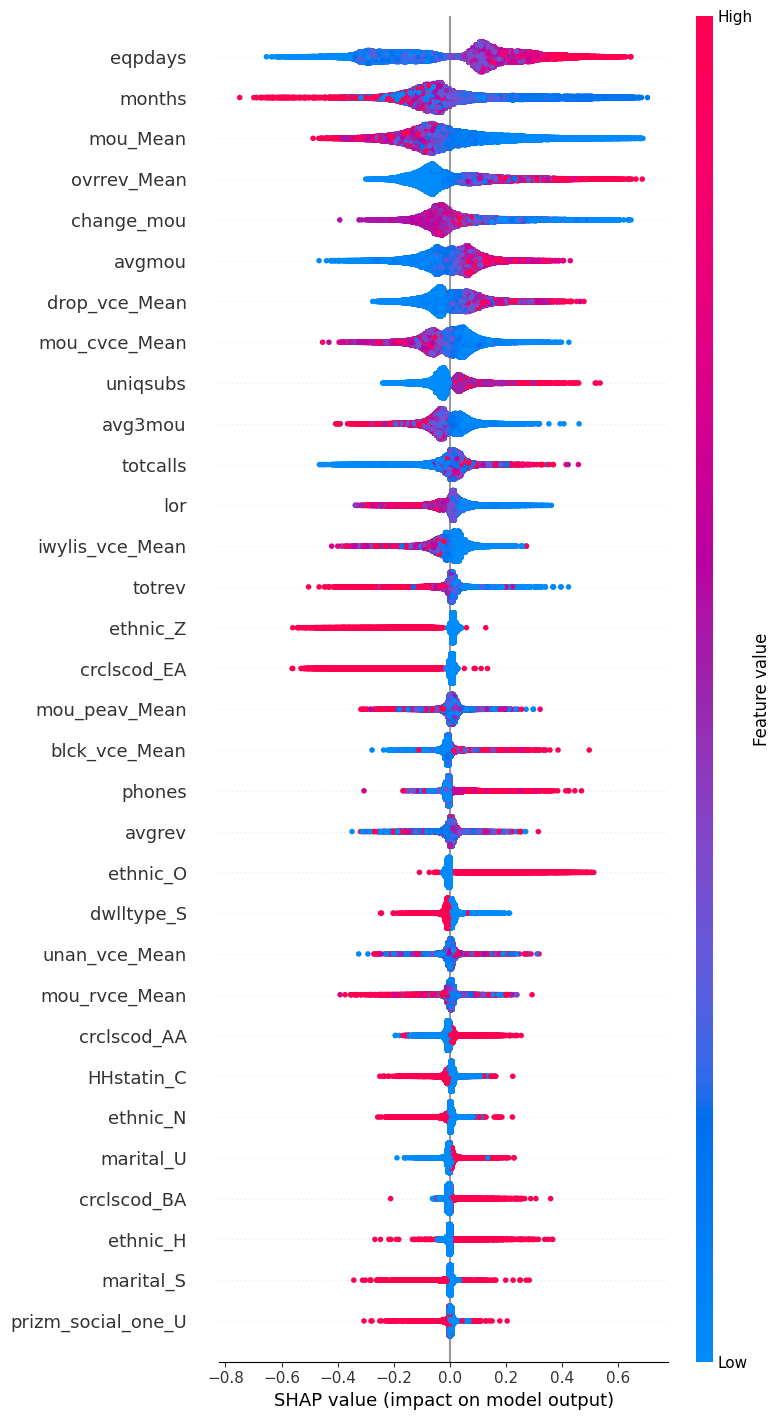

In [49]:
shap.summary_plot(
    shap_values = shap_values,
    features = X,
    max_display=32
)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


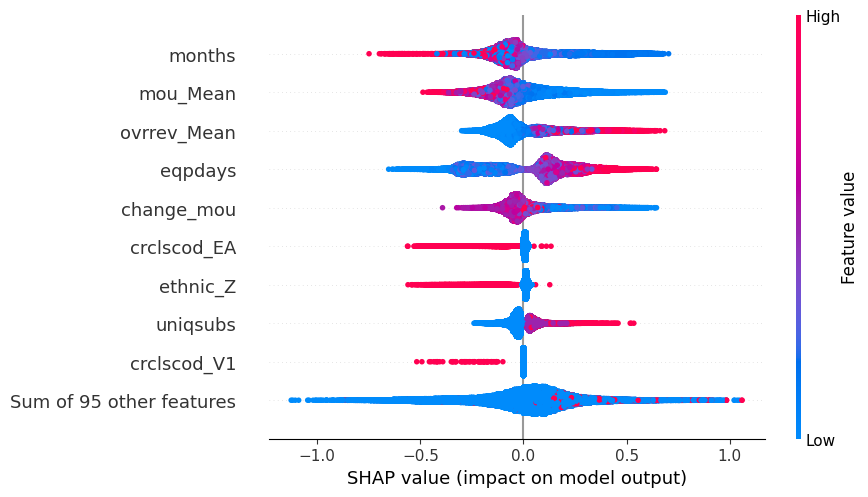

In [50]:
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0))